<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  219 non-null    float64
 1   Review  106 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  105 non-null    float64
 1   Review  106 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


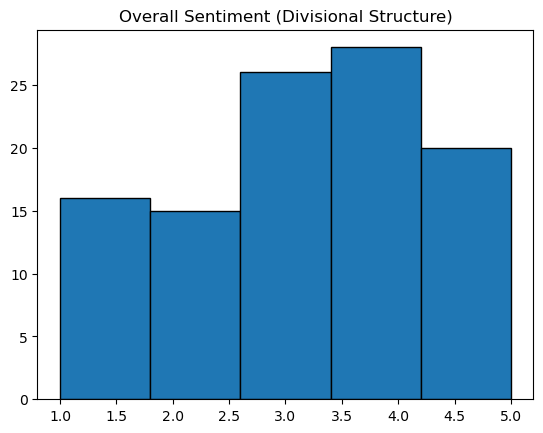

[('teams', 100), ('division', 63), ('divisions', 50), ('team', 50), ('like', 35)]


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Rating,Review,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
0,3.0,divisions feel very hit or miss some divisions...,"[divisions, feel, very, hit, or, miss, some, d...","[divisions, feel, hit, miss, divisions, feel, ...","[divisions, feel, hit, miss, divisions, feel, ...",divisions feel hit miss divisions feel great c...
4,1.0,so many division cheats,"[so, many, division, cheats]","[many, division, cheats]","[many, division, cheat]",many division cheat
5,5.0,good structure and even matches,"[good, structure, and, even, matches]","[good, structure, even, matches]","[good, structure, even, match]",good structure even match
6,4.0,only issue is the lack of proper balancing i w...,"[only, issue, is, the, lack, of, proper, balan...","[issue, lack, proper, balancing, would, comple...","[issue, lack, proper, balance, would, complete...",issue lack proper balance would completely fin...
8,5.0,good structure and grouping this year compared...,"[good, structure, and, grouping, this, year, c...","[good, structure, grouping, year, compared, la...","[good, structure, group, year, compare, last, ...",good structure group year compare last year
10,3.0,the top should be narrower in terms of divisio...,"[the, top, should, be, narrower, in, terms, of...","[top, narrower, terms, division, ranking, bott...","[top, narrower, term, division, rank, bottom, ...",top narrower term division rank bottom little ...
12,2.0,need more divisions but i know thats coming,"[need, more, divisions, but, i, know, thats, c...","[need, divisions, know, thats, coming]","[need, divisions, know, thats, come]",need divisions know thats come
13,4.0,overall did not have too many problems with th...,"[overall, did, not, have, too, many, problems,...","[overall, many, problems, teams, seemed, low, ...","[overall, many, problems, team, seem, low, hig...",overall many problems team seem low high time ...
14,2.0,ssbu division structure was questionable but u...,"[ssbu, division, structure, was, questionable,...","[ssbu, division, structure, questionable, unde...","[ssbu, division, structure, questionable, unde...",ssbu division structure questionable understan...
16,4.0,potentially expanding on more divisions challe...,"[potentially, expanding, on, more, divisions, ...","[potentially, expanding, divisions, challenger...","[potentially, expand, divisions, challengers, ...",potentially expand divisions challengers emerg...


In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#Loading The Dataset
df = pd.read_csv('NECC Divisional Structure.csv')

#Seeing The Data
df.head(10)

#Basic EDA
df.info()

#Identifying Null Reviews
df.isnull().sum()

#Removing Null Reviews
df = df.dropna(subset=['Review'])
df.info()

#Showing The Overall Sentiment
x = df['Rating']
plt.hist(x, bins=5, edgecolor='black')
plt.title("Overall Sentiment (Divisional Structure)")
plt.show()

#Removing Stop Words
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Review'] = df['Review'].apply(clean_text)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

def tokenize_text(text):
    tokens = word_tokenize(text) 
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(5)
print(most_common_words_after_removal)

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)